<a href="https://colab.research.google.com/github/WCosmo/ADL-Project_1_individual_part/blob/main/Project_1_individual_part_1_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1 - Individual Part

Sudent: Wilson Cosmo


#Initial Procedure

In [104]:
!git clone https://github.com/lasseufpa/tabular_rl.git
%cd tabular_rl
!python3 setup.py install
!pip install gymnasium

import sys
sys.path.append('/content/tabular_rl/build/lib')

fatal: destination path 'tabular_rl' already exists and is not an empty directory.
/content/tabular_rl/tabular_rl
python3: can't open file '/content/tabular_rl/tabular_rl/setup.py': [Errno 2] No such file or directory


#Getting the Main Things of the code

In [105]:
import numpy as np
from tabular_rl import simple_known_dynamics as skd
from tabular_rl import finite_mdp_utils as fmdp
from tabular_rl import known_dynamics_env as kde
from tabular_rl import optimum_values as optimum
import matplotlib.pyplot as plt

#Creating Custon Envs



In [106]:
kd = kde.KnownDynamicsEnv

nextStateProbability = np.array([[[0.2, 0.8],
								                [0.6, 0.4]],
                                [[0.8, 0.2],
								                [0.5, 0.5]]])


rewardsTable = np.array([[[((-1*0.1) + (5*0.1)), ((-1*0.3) + (5*0.5))],
								        [((-1*0.2) + (5*0.4)), ((-1*0.1) + (5*0.3))]],
                        [[((-1*0.1) + (5*0.7)), ((-1*0.1) + (5*0.1))],
								        [((-1*0.2) + (5*0.3)), ((-1*0.3) + (5*0.2))]]])

env = kd(nextStateProbability, rewardsTable)

print('Number of Actions: ', env.A)
print('Number of States: ', env.S)


Number of Actions:  2
Number of States:  2


Auxiliar Functions to measure the accumulated reward and mean reward in every step:

In [107]:
def rws(trajectory):
  rw = np.zeros(int(len(trajectory)/3))
  for i in range(int(len(trajectory)/3)):
    rw[i] = trajectory[2+3*i]

  return rw

In [108]:
def crws(rr):
  buff = 0
  crw = np.zeros(len(rr))

  for i in range(len(rr)):
    buff = buff + rr[i]
    crw[i] = buff

  return crw

In [109]:
def top_three(vetor):
  tres_maiores = sorted(set(vetor))[-3:]
  indices = []
  for i, valor in enumerate(vetor):
    if valor in tres_maiores:
      indices.append(i)

  return indices

In [110]:
def mean_crw(rr):
  bufff = rr
  mcrw = np.zeros(len(rr))
  #np.mean(bufff[:len(bufff)])

  for i in range(len(bufff)):
    mcrw[i] = np.mean(bufff[:i+1])

  return mcrw

# 1. Optimum policy

In [111]:
total_number_of_updates = 500000
num_episodes = 100
max_num_time_steps_per_episode = total_number_of_updates // num_episodes
optimum.compare_q_learning_with_optimum_policy(env,
                                               max_num_time_steps_per_episode=max_num_time_steps_per_episode,
                                               num_episodes=num_episodes,
                                               explorationProbEpsilon=0.2)


Method compute_optimal_action_values() converged in 198 iterations with stopping criterion= 9.549449862834748e-11


/content/tabular_rl/tabular_rl/src/known_dynamics_env.py:159: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  valid_actions = self.possible_actions_per_state[int(s)]



Using optimum policy, average reward= 230.54800000000003  standard deviation= 9.057488393589008
Running 1  runs of q_learning_several_episodes() with 100 episodes per run


/content/tabular_rl/tabular_rl/src/finite_mdp_utils.py:231: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return np.random.choice(possible_actions_per_state[int(state)])


Found better stateActionValues
run= 0 average reward= 2.184450000000002
stateActionValues: [[22.91780264 22.547285  ]
 [23.46379509 21.98580315]]
rewardsQLearning: [2.02  2.091 2.022 2.052 2.024 2.007 2.081 2.309 2.28  2.44  2.383 2.078
 2.187 2.176 1.985 2.16  2.19  2.212 1.922 2.062 2.159 2.24  2.114 2.126
 2.371 2.223 2.2   2.212 2.299 2.464 2.124 2.163 2.302 2.361 2.172 2.186
 2.17  2.375 2.093 2.207 2.259 2.311 2.229 2.093 2.309 2.007 2.204 2.375
 2.14  2.236 2.219 2.226 2.318 2.252 2.284 2.27  2.195 1.956 1.956 2.233
 2.111 2.171 2.274 2.175 2.078 2.139 2.209 2.14  2.129 2.177 2.076 2.205
 2.237 2.115 2.239 2.124 2.26  2.318 2.254 2.336 2.025 2.108 2.213 2.266
 2.085 2.133 2.317 2.192 2.253 2.187 2.217 2.134 1.934 2.349 1.973 2.142
 2.1   2.228 2.442 2.066]

Using Q-learning policy, average reward= 233.74600000000007  standard deviation= 8.717607699363377
Check the Q-learning policy:

s0=0
 | a0=0
s1=1
 | a0=0


# 2. Finding best parameter combination for Q Learning

In [112]:
num_steps = 100

alphas = [0.1, 0.01]
gammas = [0.5, 0.95]
episodes = [100, 1000]

a_conf = []
a_vect = []

for alpha in alphas:
  for gamma in gammas:
    for episode in episodes:
      qPoli = fmdp.q_learning_several_episodes(env, episodes_per_run= episode, stepSizeAlpha=alpha, discountGamma=gamma, verbosity=0)
      #print(qPoli[1])
      #print('\n---\n')
      qPoli = fmdp.convert_action_values_into_policy(qPoli[0])
      taken_actions, rewards_tp1, states = fmdp.generate_trajectory(env, qPoli, num_steps)
      trajectory = fmdp.format_trajectory_as_single_array(taken_actions, rewards_tp1, states)
      #print("\nComplete trajectory vector:\n")
      #print(trajectory)
      rr = rws(trajectory)
      a_vect.append(crws(rr))
      #print(crws(rr))
      ti = 'a=' + str(alpha) + ', g=' + str(gamma) + ', num_ep=' + str(episode)
      a_conf.append(ti)


In [113]:
crww = np.zeros(len(a_vect))

for i in range(len(a_vect)):
  crww[i] = a_vect[i][len(a_vect[i]) - 1]

iiii = top_three(crww)
print('Top 3 combination indices: ', iiii)

Top 3 combination indices:  [0, 1, 5]


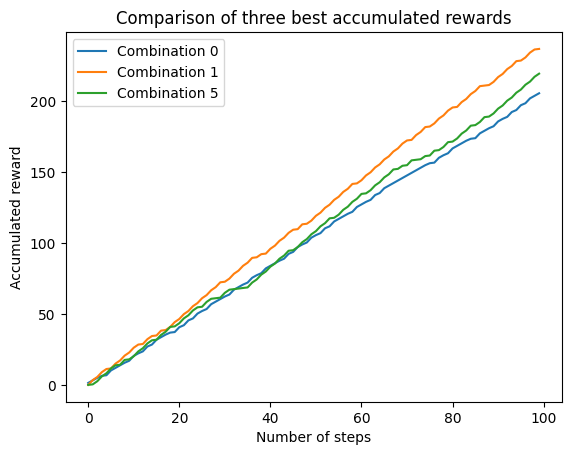

In [114]:
for i in range(len(iiii)):
  plt.plot(a_vect[iiii[i]], label= str('Combination ' + str(iiii[i])))

plt.xlabel('Number of steps')
plt.ylabel('Accumulated reward')
plt.title('Comparison of three best accumulated rewards')

plt.legend()
plt.show()

In [115]:
for i in range(len(iiii)):
  print('Combination ' + str(iiii[i]) + ', config: ' + str(a_conf[iiii[i]]))

Combination 0, config: a=0.1, g=0.5, num_ep=100
Combination 1, config: a=0.1, g=0.5, num_ep=1000
Combination 5, config: a=0.01, g=0.5, num_ep=1000


# 3. Convergence check of Q Learning

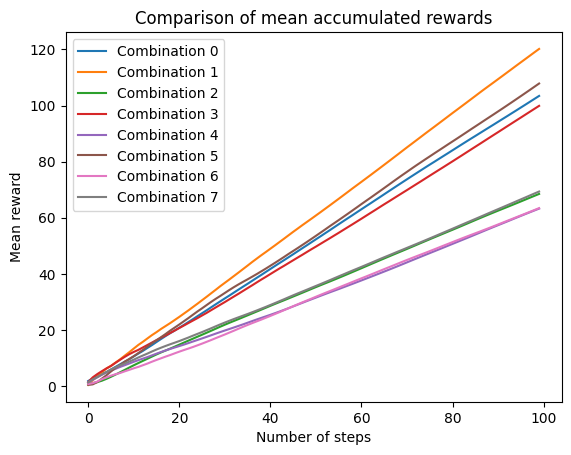

In [116]:
for i in range(len(a_vect)):
  plt.plot(mean_crw(a_vect[i]), label= str('Combination ' + str(i)))

plt.xlabel('Number of steps')
plt.ylabel('Mean reward')
plt.title('Comparison of mean accumulated rewards')

plt.legend()
plt.show()